In [162]:
new_dataframe = pd.read_csv('df-dates-seperated.csv')
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [226]:


def segment_prediction(predict_year,predict_month,segment,segment_item,segment_2,segment_item_2):
    
    Cat_name = []
    array_1 = []
    y = 1
    to_year = int(new_dataframe['year'].max())
    from_year =int( new_dataframe['year'].min())
    years_diff = predict_year- from_year
    months_diff  = (years_diff * 12)+ predict_month

    if segment == 'Catagory':segment_name = ['Top', 'Bottom', 'Dress', 'Jumpsuit']
    elif segment == 'Size': segment_name = ['Small', 'Medium', 'Large']
    elif segment == 'Color': segment_name = ['Black', 'White', 'Colored', 'Pattenred']

    if segment_2 == 'Catagory':segment_name_2 = ['Top', 'Bottom', 'Dress', 'Jumpsuit']
    elif segment_2 == 'Size': segment_name_2 = ['Small', 'Medium', 'Large']
    elif segment_2 == 'Color': segment_name_2 = ['Black', 'White', 'Colored', 'Pattenred']

    for x in range(from_year,(to_year+1) ):
        Cat_name_1= [y,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,y+10,y+11]
        y = y +12
        Cat_name = np.concatenate((Cat_name, Cat_name_1))
        selected_group = new_dataframe.loc[(new_dataframe["year"] == x)]
        #Selecting without segment
        if segment == 0:
            selected_group_2 = selected_group
        else:  # selecting Segment 1
            selected_group_2 = selected_group.loc[(selected_group[segment] == segment_item)]

        if segment_2 == 0:
            selected_group_3 = selected_group_2
        else:  # selecting Segment  2
            selected_group_3 = selected_group_2.loc[(selected_group_2[segment_2] == segment_item_2)]
    
        count_group = selected_group_3.groupby(['month'])['month'].count() 
        seleced_df = pd.DataFrame(Cat_name, columns=['month'])
        for x in count_group:
            array_1.append(x)

    x = np.array(Cat_name).reshape((-1, 1))
    y = np.array(array_1)
    model = LinearRegression()
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)

    x_pred= [[months_diff]]
    y_pred = model.predict(x_pred)
    y_pred_graph =model.predict(x)
   
        
        
        
    if segment==0:
        if segment_2==0:
            title ="number of sales for all of datas is:" +str(round(y_pred[0]))
        else:
            title ="number of sales for segment:"+str( segment_2)+" "+segment_name_2[segment_item_2]
    else:
        if segment_2==0 :
            title ="number of sales for segment:"+str( segment)+" "+segment_name[segment_item]
        else:
            title ="Number of sales prediction for segments:"+str( segment)+" "+segment_name[segment_item]+" and "+str( segment_2)+" "+segment_name_2[segment_item_2]
    
    title_info= title +' is: ' +str(round(y_pred[0]))
    print(title_info)
    print(f"coefficient of determination: {round(r_sq,2)}")
    plt.plot(x, y_pred_graph,color='g') 
    plt.title(title)
    plt.scatter(Cat_name, array_1,color='k') 
    plt.show()


number of sales for all of datas is:425 is:425
coefficient of determination: 0.92


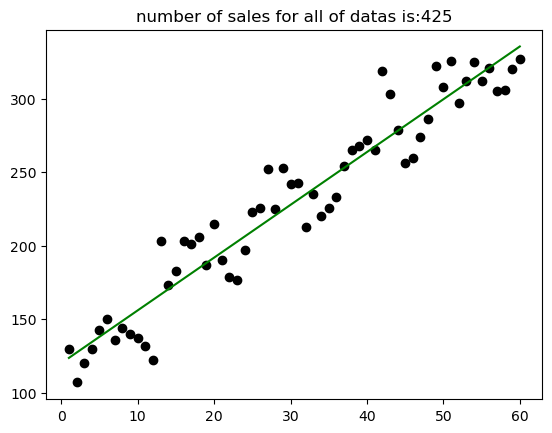

In [227]:
segment_prediction(2025,1,0,3,0,2)

Number of sales prediction for segments:Catagory Jumpsuit and Size Large is:21
coefficient of determination: 0.5


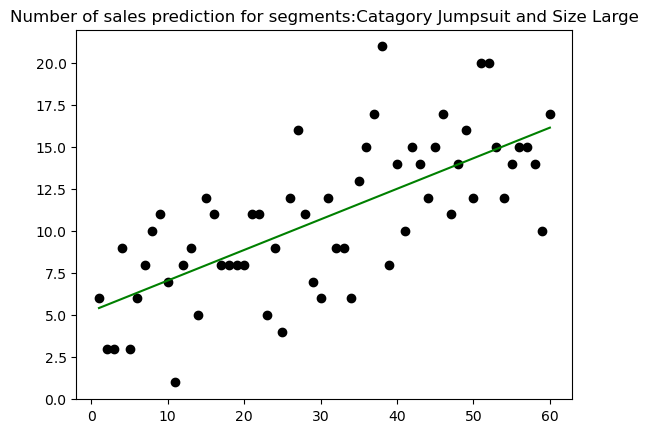

In [228]:
segment_prediction(2025,1,'Catagory',3,'Size',2)

Number of sales prediction for segments:Size Large and Color Colored is: 18
coefficient of determination: 0.52


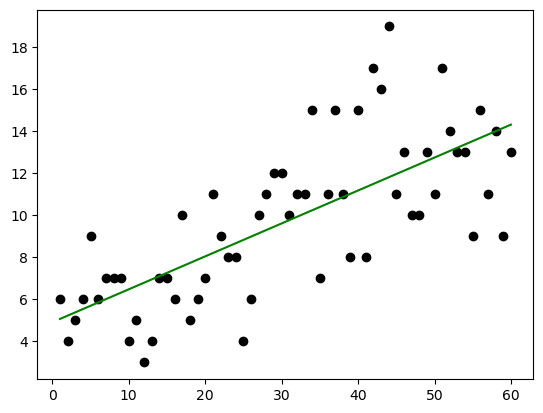

In [209]:
segment_prediction(2025,1,'Size',2,'Color',2)